## GAMING WEBSITES VS. GAMERS

## CREATING A COMPARISON BETWEEN USER RATING AND WEBSITE RATING

In [1]:
## Loading the dataset
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_e62b6c1bb76c4710b1d1cc5aeab9a929 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='9ZymKSD_6E0Aw3YRO1fn1RBF95BmxW_zKvIslTE4CC4g',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_e62b6c1bb76c4710b1d1cc5aeab9a929.get_object(Bucket='databel-donotdelete-pr-d4qsbyzwywn9lq',Key='vandal.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()



,id,game,platform,website_rating,user_rating,release,developer,classification,preview,url
0,1,¡Has sido tú!,PS4,7.5,7.69,4/7/2017,Wish Studios & Sony,PEGI +12,La razón por la que han existido las consolas ...,https://vandal.elespanol.com/analisis/ps4/has-...
1,2,#IDARB,Xbox One,8.2,7,3/2/2015,Other Ocean Interactive,PEGI +3,"Es un fenómeno curioso, pero bien podríamos de...",https://vandal.elespanol.com/analisis/xbone/id...
2,3,007 Racing,PS One,6.9,4.88,Enero 2001,EA Games & Electronic Arts,None,"Bond, James BondCon la reciente tirada de títu...",https://vandal.elespanol.com/analisis/psx/007-...
3,4,007: Agente en Fuego Cruzado,GameCube,7.7,6.3,Año 2002,EA Games & Electronic Arts,None,"No podía ser de otra maneraBond vuelve, no pod...",https://vandal.elespanol.com/analisis/gcn/007-...
4,5,007: Nightfire,GameCube,8.7,6.93,29/11/2002,Eurocom & EA Games,None,Licencia para matarAunque son muchos los jueg...,https://vandal.elespanol.com/analisis/gcn/007-...


## DATA CLEANING

In [2]:
df_game = df_data_1[['platform', 'website_rating', 'user_rating']]

In [3]:
df_game.head()

,platform,website_rating,user_rating
0,PS4,7.5,7.69
1,Xbox One,8.2,7
2,PS One,6.9,4.88
3,GameCube,7.7,6.3
4,GameCube,8.7,6.93


In [4]:
df_game.shape

(11910, 3)

In [5]:
df_game.columns

Index(['platform', 'website_rating', 'user_rating'], dtype='object')

In [6]:
df_game[['website_rating', 'user_rating']] = df_game[['website_rating','user_rating']].convert_objects(convert_numeric = True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [7]:
df_game.corr()

,website_rating,user_rating
website_rating,1.000000,0.445945
user_rating,0.445945,1.000000


In [8]:
df_game = df_game[df_game['platform'] != 'Android']
df_game = df_game[df_game['platform'] != 'iPhone']
df_game = df_game[df_game['platform'] != 'PC']

In [9]:
df_game = df_game.dropna().reset_index(drop = True)

In [10]:
df_game.head()

,platform,website_rating,user_rating
0,PS4,7.5,7.69
1,Xbox One,8.2,7.00
2,PS One,6.9,4.88
3,GameCube,7.7,6.30
4,GameCube,8.7,6.93


In [11]:
df_game_x = df_game['website_rating'] 
df_game_y = df_game['user_rating']

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [13]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [14]:
df_game1 = df_game.groupby("platform").mean()

In [15]:
df_game1

,website_rating,user_rating
platform,,
Dreamcast,8.163725,7.282745
Game Boy Advance,8.319130,7.676783
GameCube,7.948701,7.397987
N-Gage,6.333333,7.523333
NDS,7.532571,7.191629
Nintendo 3DS,7.653053,7.665038
Nintendo 64,9.273684,8.136842
PS One,8.128646,7.231562
PS2,7.805396,7.245450


In [16]:
df_game1.index

Index(['Dreamcast', 'Game Boy Advance', 'GameCube', 'N-Gage', 'NDS',
       'Nintendo 3DS', 'Nintendo 64', 'PS One', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSVITA', 'Switch', 'Wii', 'Wii U', 'Xbox', 'Xbox 360', 'Xbox One'],
      dtype='object', name='platform')

## EXPLORATORY ANALYSIS

In [17]:
line = linear_model.LinearRegression() 

In [18]:
df_game1_x = df_game.loc[:, "website_rating"].values.reshape(-1, 1) 
df_game1_y = df_game.loc[:, "user_rating"].values.reshape(-1, 1) 

In [19]:
line.fit(df_game1_x, df_game1_y) 
pred = line.predict(df_game1_x)

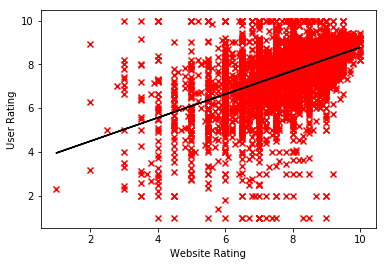

In [20]:
plt.scatter('website_rating', 'user_rating', data = df_game, marker = 'x', color = 'red')
plt.xlabel("Website Rating")
plt.ylabel("User Rating")
plt.plot(df_game1_x,pred, color='black')
plt.show()

In [21]:
df_game.corr()

,website_rating,user_rating
website_rating,1.000000,0.476772
user_rating,0.476772,1.000000


In [22]:
df_game2 = df_game1['user_rating']

In [23]:
df_game2.head()

platform
Dreamcast           7.282745
Game Boy Advance    7.676783
GameCube            7.397987
N-Gage              7.523333
NDS                 7.191629
Name: user_rating, dtype: float64

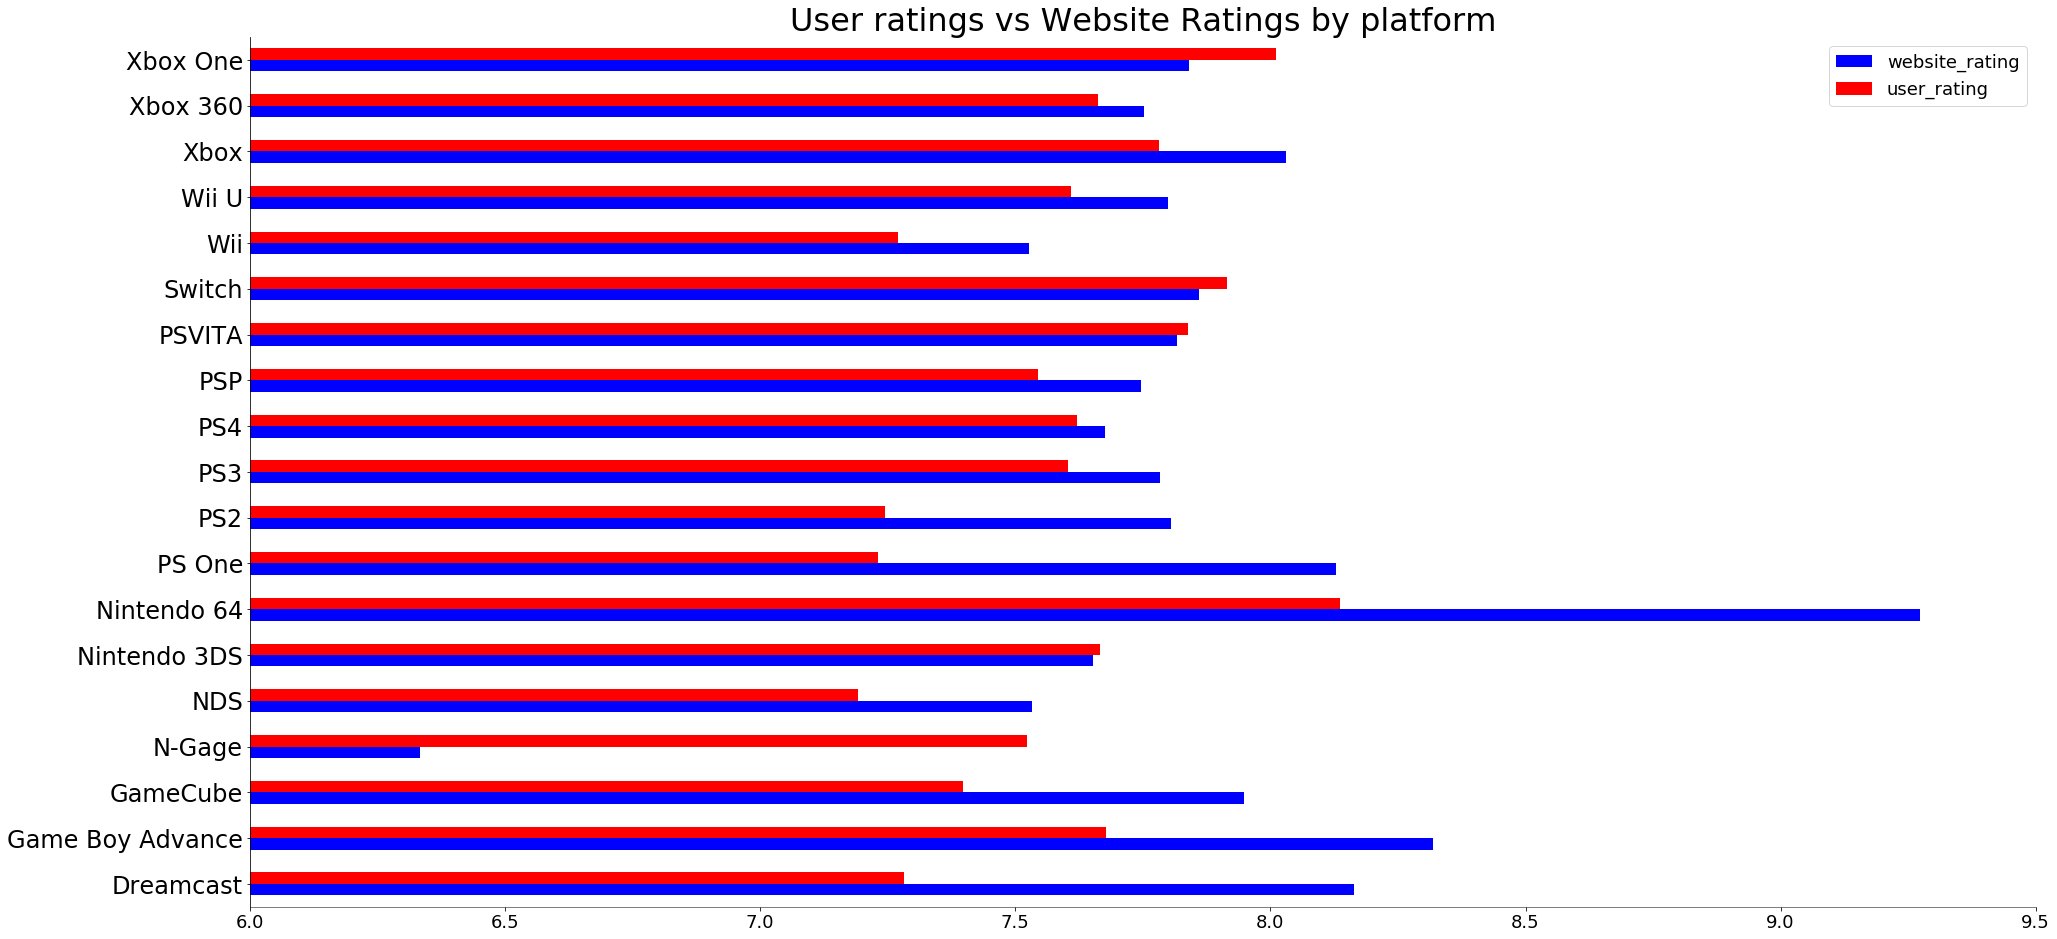

In [24]:
## A horizontal bar graph showing us the user ratings by platforms
bar = df_game1.plot(kind='barh',figsize=(32, 16), color = ["blue","red"])
bar
plt.yticks(fontsize = 24)
plt.xticks(fontsize = 18)
plt.xlim(6,9.5)
plt.ylabel("")
plt.title("User ratings vs Website Ratings by platform", fontsize=32)
bar.spines['top'].set_visible(False)
bar.spines['right'].set_visible(False)
bar.spines['bottom'].set_linewidth(0.5)
bar.spines['left'].set_visible(True)
plt.legend(loc="upper right", fontsize=18)
plt.show()

In [25]:
df_game_2 = df_data_1[['platform', 'user_rating', 'website_rating','game']]

In [26]:
df_game_2 = df_game_2[df_game_2['platform'] != 'Android']
df_game_2 = df_game_2[df_game_2['platform'] != 'iPhone']
df_game_2 = df_game_2[df_game_2['platform'] != 'PC']

In [27]:
df_game_2 = df_game_2[df_game_2['website_rating'] != 'None']
df_game_2 = df_game_2[df_game_2['user_rating'] != 'None']

In [28]:
df_game_2 = df_game_2.dropna().reset_index(drop = True)

In [29]:
df_game_2.sort_values(by = "website_rating", ascending = False).head(10)

,platform,user_rating,website_rating,game
6226,Wii,9.2,9.9,Xenoblade Chronicles
2086,PS2,9.01,9.9,Grand Theft Auto: San Andreas
3207,Dreamcast,8.43,9.9,Metropolis Street Racer
4607,Dreamcast,9.18,9.9,ShenMue
6287,Nintendo 64,8.9,9.9,Zelda: Majora's Mask
3160,PS2,9.29,9.8,Metal Gear Solid 3: Snake Eater
5389,Xbox 360,9.21,9.8,The Elder Scrolls V: Skyrim
3196,GameCube,9.12,9.8,Metroid Prime
3195,Game Boy Advance,8.59,9.8,Metroid Fusion
5431,PS3,9.42,9.8,The Last of Us


In [30]:
df_game_2.sort_values(by = "user_rating", ascending = False).head(10)

,platform,user_rating,website_rating,game
6224,PS3,9.92,9,XCOM: Enemy Within
147,PS3,9.92,7,Angry Birds Trilogy
6276,PSVITA,9.91,8.8,Ys VIII: Lacrimosa of Dana
5384,PS4,9.9,7,The Elder Scrolls Online: Morrowind
6260,Switch,9.9,8,Yoku's Island Express
372,Xbox One,9.9,8,Battle Chasers: Nightwar
1218,Xbox 360,9.85,7,Disney Universe
2481,Wii,9.85,8,Just Dance 2015
6017,PS4,9.83,5.6,Warhammer 40.000: Inquisitor - Martyr
1135,Xbox One,9.83,8.5,Deus Ex: Mankind Divided
